<a href="https://colab.research.google.com/github/VemareddyDaram/NLP_Assignment2_EDC_Vemareddy_Daram/blob/main/TopicModeling_3rdAssignment_Vemareddy_Daram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# 1. Load the dataset
with open('/content/sample_data/newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

In [ ]:
def preprocess(text):
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

cleaned_data = [preprocess(doc) for doc in newsgroup_data]

In [ ]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(cleaned_data)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_data = tfidf_vectorizer.fit_transform(cleaned_data)

In [ ]:
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(count_data)

In [ ]:
nmf_model = NMF(n_components=10, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_data)

In [ ]:
def display_topics(model, feature_names, n_top_words, title):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n{title} Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [ ]:
n_top_words = 10
display_topics(lda_model, count_vectorizer.get_feature_names_out(), n_top_words, "LDA")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), n_top_words, "NMF")


LDA Topic 1:
25 team new time 10 gm know pick hockey edu

LDA Topic 2:
55 pit chi det bos tor stl van la nyi

LDA Topic 3:
game year team good games play season got 10 win

LDA Topic 4:
like people time want long know think way used going

LDA Topic 5:
think car like know good right new insurance years say

LDA Topic 6:
good like ground know say better year really people think

LDA Topic 7:
like know think vga use car good time data monitor

LDA Topic 8:
drive disk scsi use hard card drives controller problem bios

LDA Topic 9:
edu com people cs gordon banks ca soon pitt david

LDA Topic 10:
space nasa god people new center information atheism cancer research

NMF Topic 1:
time bike good like use want problem way look work

NMF Topic 2:
geb pitt skepticism intellect chastity shameful dsl cadre n3jxp surrender

NMF Topic 3:
drive scsi disk drives hard cable floppy problem mac power

NMF Topic 4:
game team year games players season hockey win play teams

NMF Topic 5:
car cars driving de

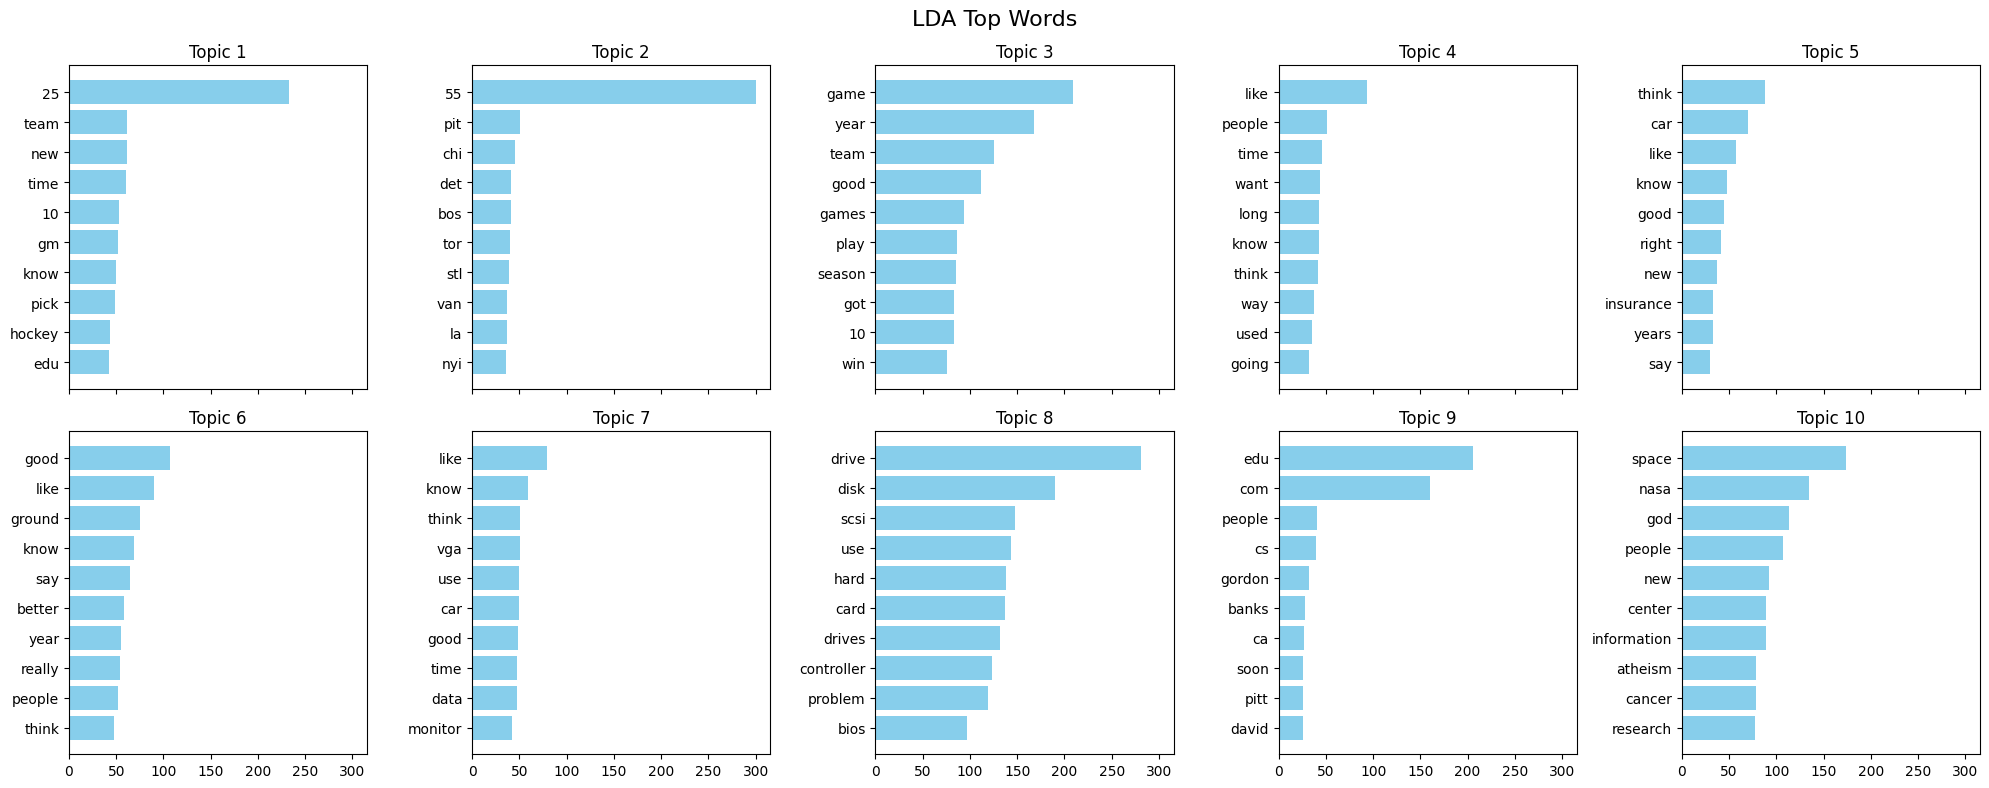

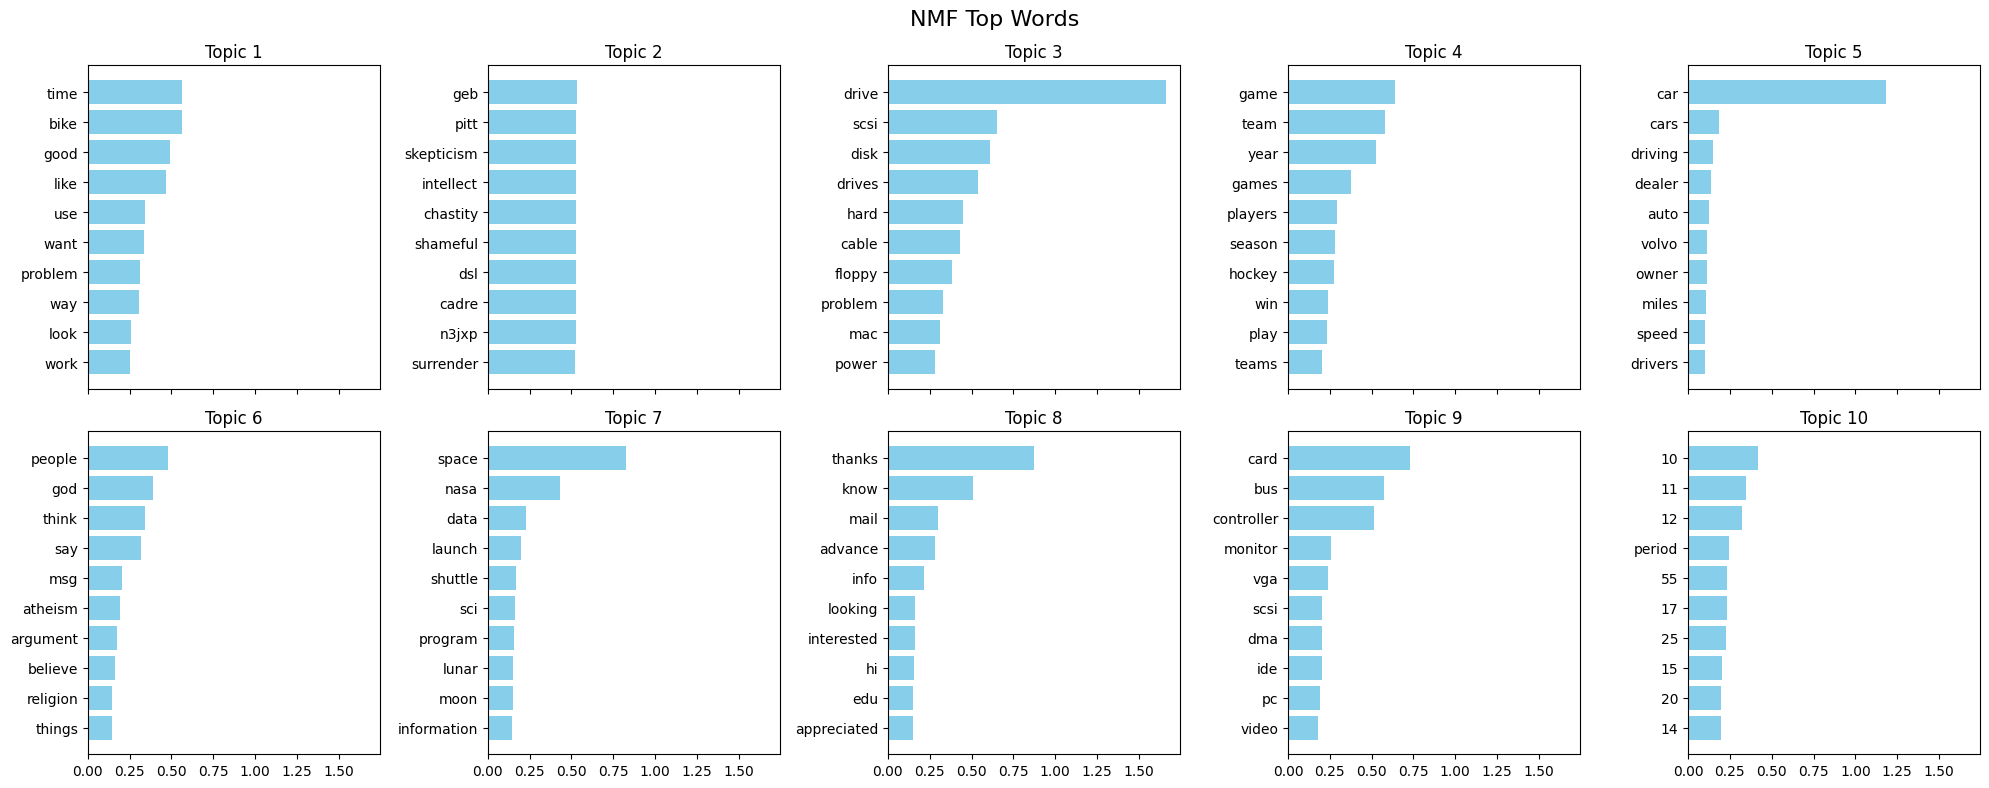

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, color='skyblue')
        ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 12})
        ax.invert_yaxis()

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot for LDA
plot_top_words(lda_model, count_vectorizer.get_feature_names_out(), n_top_words, "LDA Top Words")

# Plot for NMF
plot_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), n_top_words, "NMF Top Words")

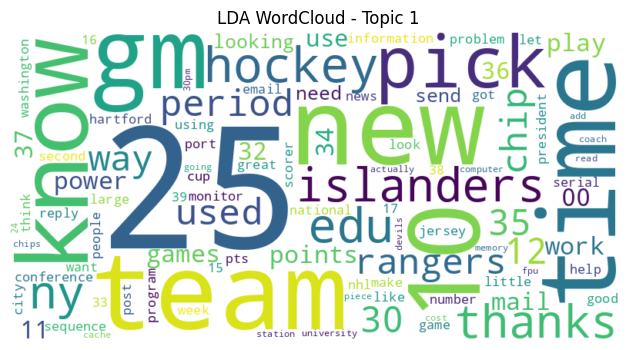

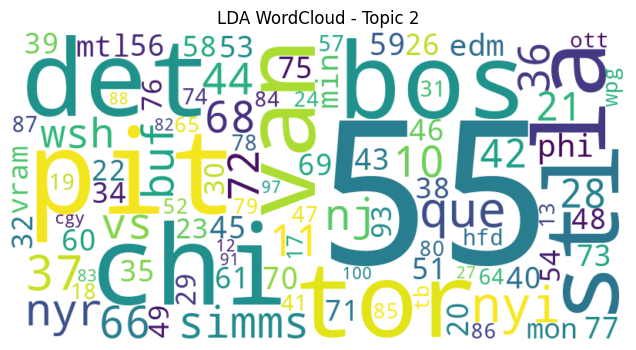

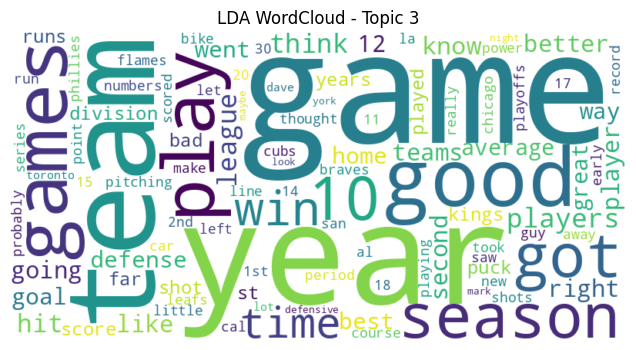

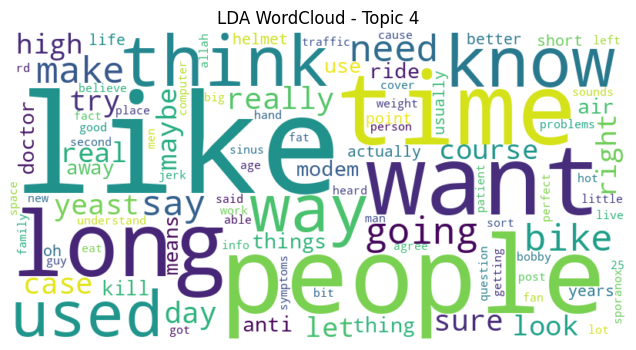

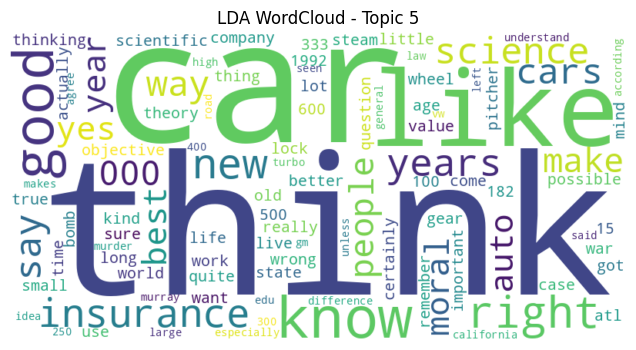

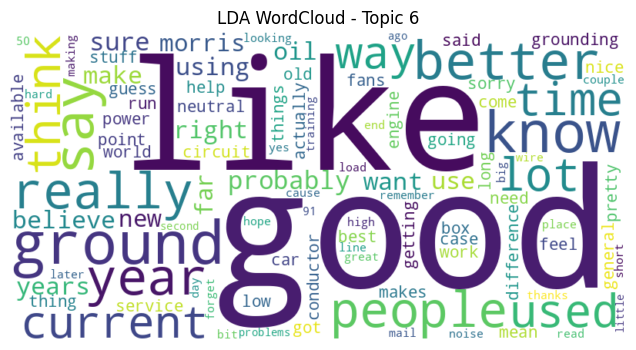

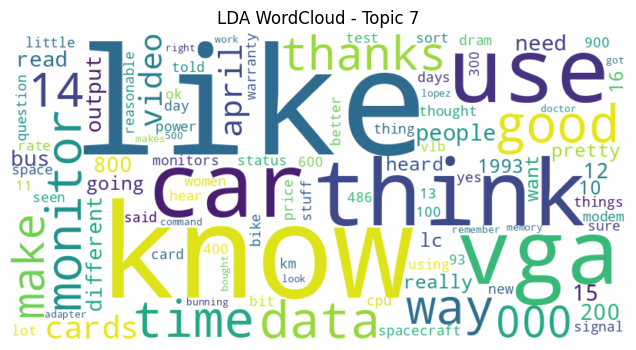

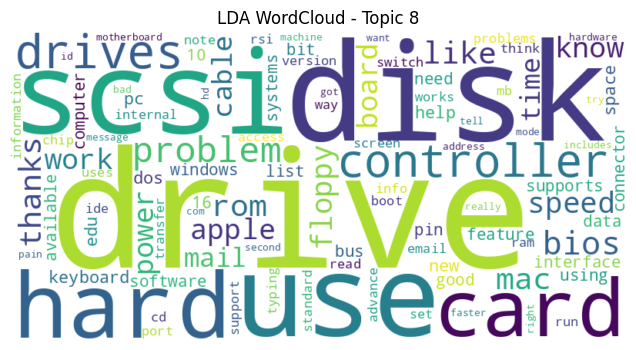

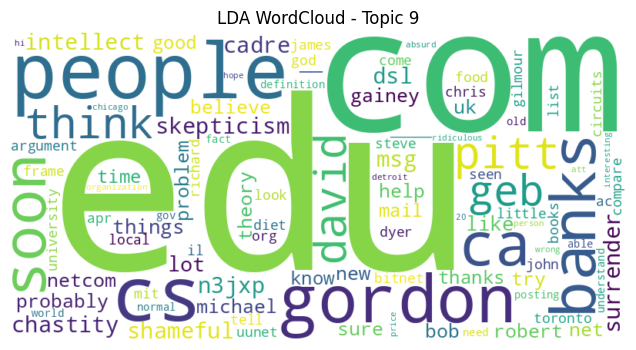

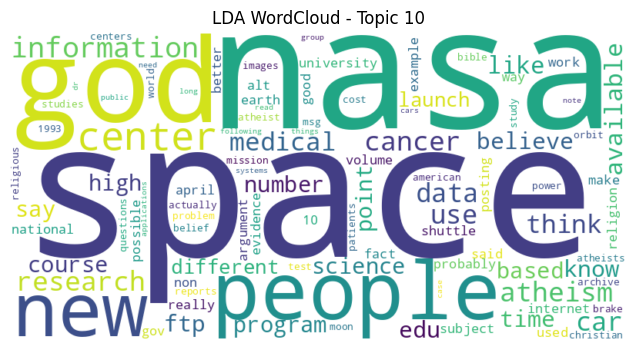

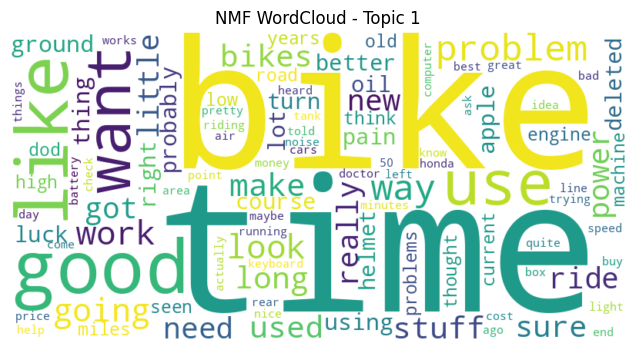

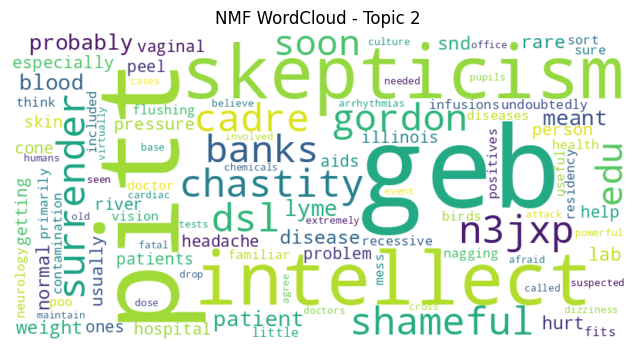

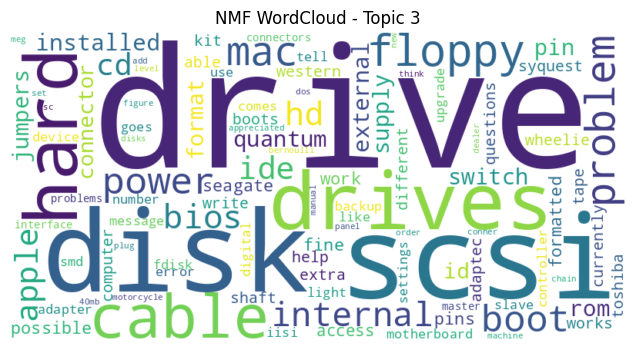

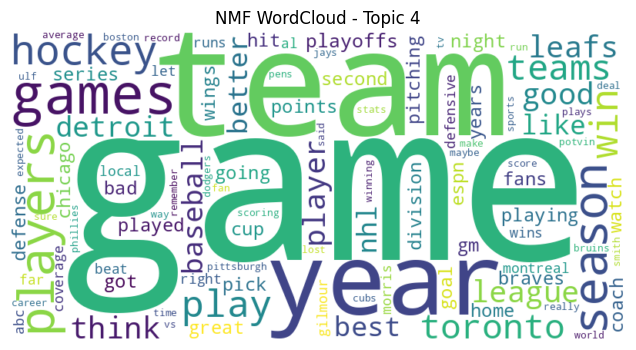

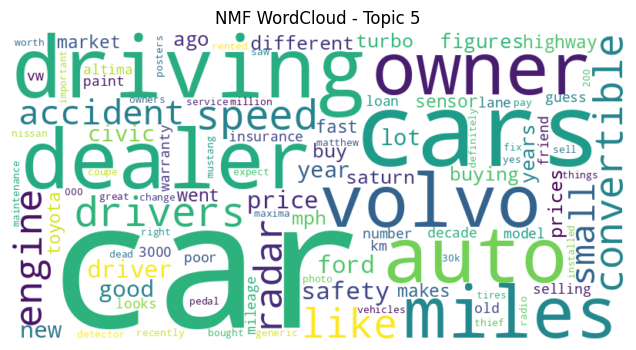

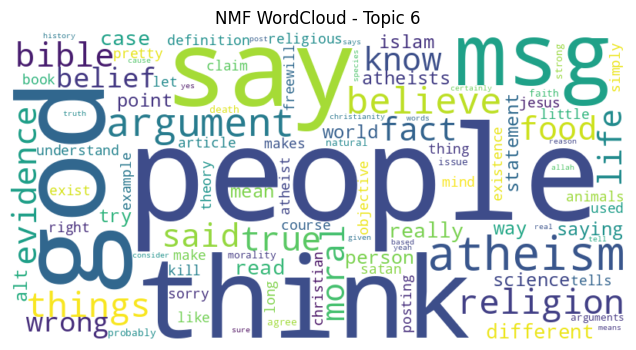

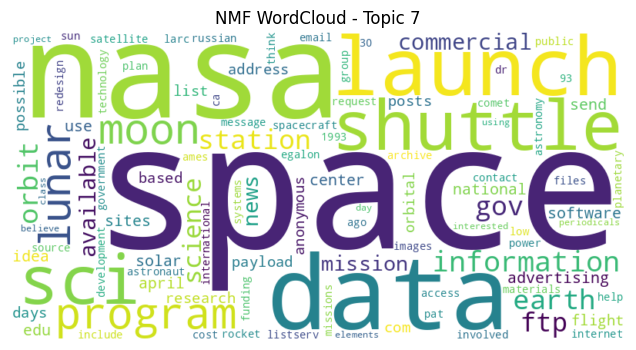

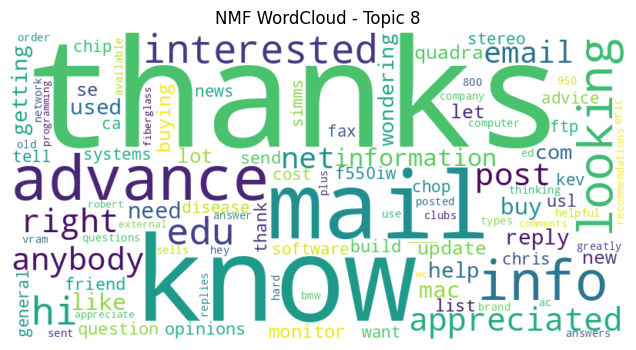

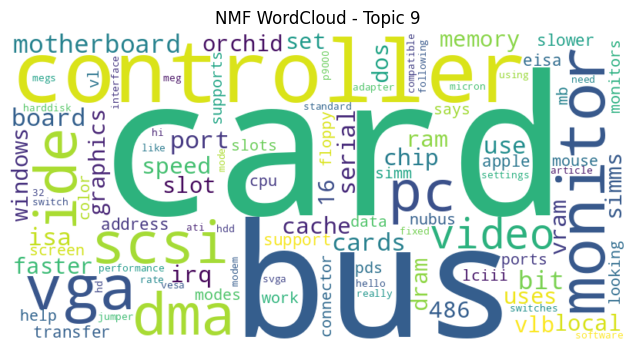

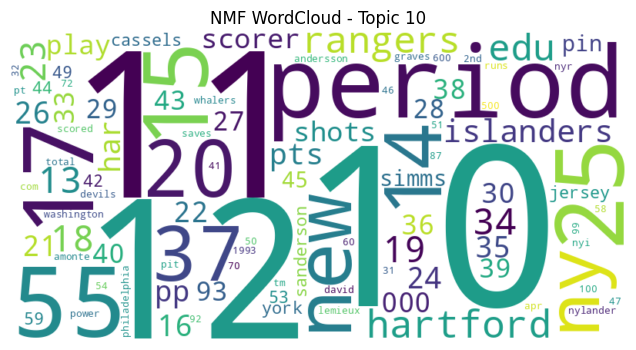

In [ ]:
def plot_wordclouds(model, feature_names, title):
    for topic_idx, topic in enumerate(model.components_):
        word_freqs = {feature_names[i]: topic[i] for i in topic.argsort()[:-100 - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freqs)
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{title} - Topic {topic_idx + 1}')
        plt.show()

# WordCloud for LDA
plot_wordclouds(lda_model, count_vectorizer.get_feature_names_out(), "LDA WordCloud")

# WordCloud for NMF
plot_wordclouds(nmf_model, tfidf_vectorizer.get_feature_names_out(), "NMF WordCloud")